In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 데이터셋 설명

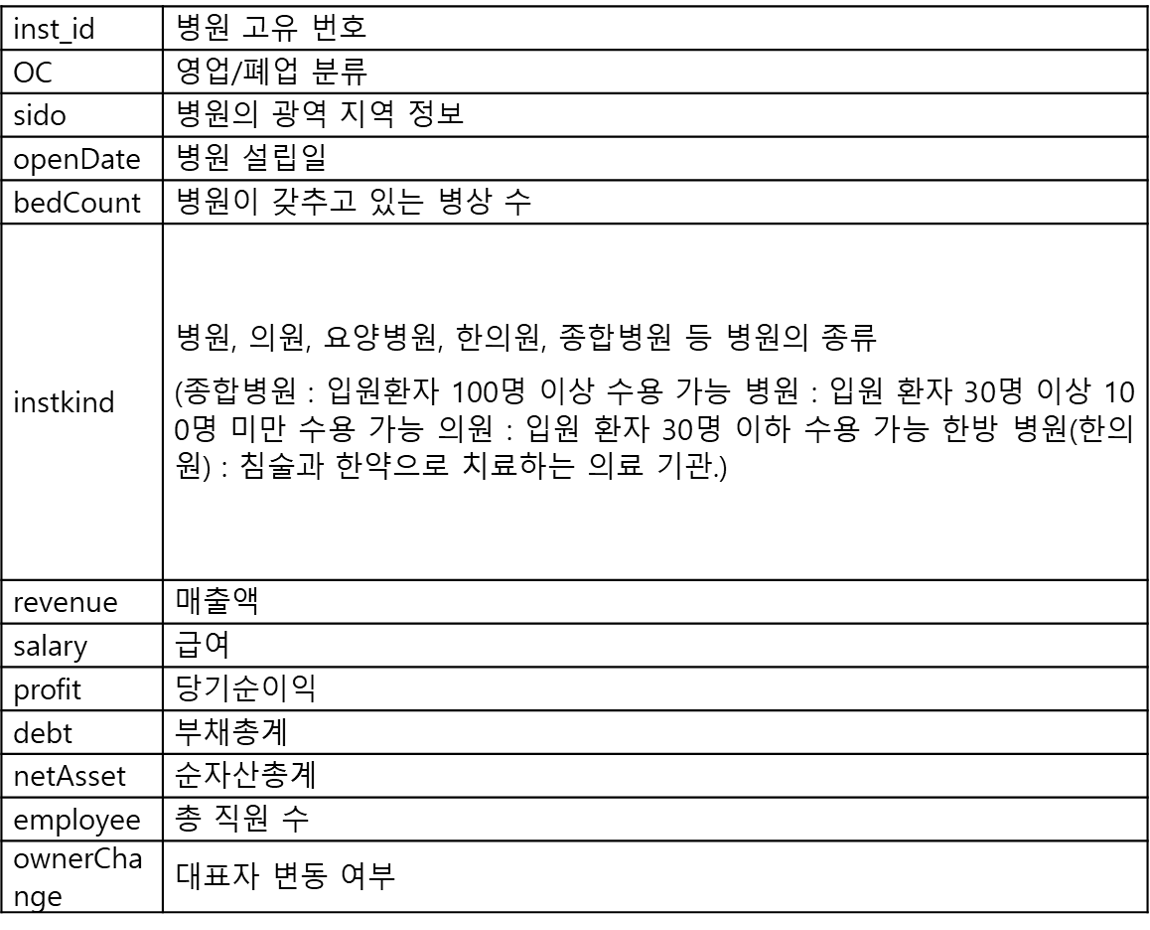

In [2]:
## 데이터셋 설명

## 1. 데이터 로드
- medical_data.csv를 로드

In [2]:
# import csv
# f = open('medical_data.csv')
# df = csv.reader(f)
df = pd.read_csv('C:/Users/Dain/Python_Jupyter/데이터처리언어/medical_data.csv')


## 2. 데이터의 처음 5개 값 출력

In [3]:
df.head()

,inst_id,OC,sido,openDate,bedCount,instkind,revenue,salary,profit,debt,netAsset,employee,ownerChange
0,1,open,choongnam,20071228,175.0,nursing_hospital,4.217530e+09,2.033835e+09,225169678.0,6.828260e+08,2.844460e+09,62.0,same
1,3,open,gyeongnam,19970401,410.0,general_hospital,NaN,NaN,NaN,NaN,NaN,801.0,same
2,4,open,gyeonggi,20161228,468.0,nursing_hospital,1.004522e+09,2.964023e+08,41864754.0,9.241434e+07,3.005088e+08,234.0,same
3,7,open,incheon,20000814,353.0,general_hospital,7.250734e+10,3.178605e+10,902830288.0,4.236380e+10,1.385710e+10,663.0,same
4,9,open,gyeongnam,20050901,196.0,general_hospital,4.904354e+10,2.446078e+10,80749696.0,4.989811e+10,8.631164e+07,206.0,same


## 3. 수치형 변수의 통계 정보 확인

In [4]:
df_num = df[['bedCount', 'revenue', 'salary', 'profit', 'debt', 'netAsset', 'employee']]
df_num.describe()

,bedCount,revenue,salary,profit,debt,netAsset,employee
count,296.000000,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,291.000000
mean,145.709459,1.288175e+10,5.654115e+09,2.101700e+08,8.765310e+09,5.938213e+09,142.546392
std,118.923890,2.043543e+10,8.083343e+09,1.134673e+09,1.286112e+10,1.266035e+10,160.191073
min,0.000000,0.000000e+00,0.000000e+00,-4.696701e+09,0.000000e+00,-2.019624e+10,0.000000
25%,52.750000,3.252112e+09,1.626053e+09,-2.168279e+06,1.953077e+09,1.224795e+09,53.500000
50%,136.500000,5.524218e+09,2.659892e+09,8.130751e+07,4.457667e+09,3.033907e+09,80.000000
75%,193.000000,1.274839e+10,6.363400e+09,2.930329e+08,9.437917e+09,5.982550e+09,181.500000
max,656.000000,1.510000e+11,6.403559e+10,7.475427e+09,8.669725e+10,1.390000e+11,1200.000000


## 4. 수치형 변수 값에 결측치가 하나라도 존재하는 병원 데이터 전체를 삭제

In [5]:
# df.isnull().sum()
df.dropna(axis=0, inplace=True)
df.isnull().sum()

inst_id        0
OC             0
sido           0
openDate       0
bedCount       0
instkind       0
revenue        0
salary         0
profit         0
debt           0
netAsset       0
employee       0
ownerChange    0
dtype: int64

## 5. 당기순이익이 높은 상위 10개 병원의 병원 고유 번호, 영업/폐업 분류, 병원 설립일, 병원 종류 정보 출력

In [6]:
df1 = df.sort_values('profit', ascending = False)
df1.loc[:, ['inst_id', 'OC', 'openDate', 'instkind']].head(10)

,inst_id,OC,openDate,instkind
292,417,open,20020401,general_hospital
276,390,open,20071031,nursing_hospital
273,384,open,20140804,general_hospital
272,383,open,20160826,hospital
221,317,open,20070104,general_hospital
267,375,open,19920801,hospital
245,350,open,19970728,clinic
75,112,open,20070807,nursing_hospital
41,65,open,20110512,hospital
243,347,open,19920930,hospital


## 6. 병원 종류 별 총 직원 수의 평균값 출력

In [7]:
df2 = df.loc[:, ['instkind', 'employee']]
groups = df2.groupby('instkind')
groups.mean('employee')

,employee
instkind,
clinic,84.764706
dental_clinic,107.000000
general_hospital,384.848485
hospital,126.048193
nursing_hospital,97.532847
traditional_clinic,79.666667
traditional_hospital,43.000000


## 7. 대표자가 변동된 병원들의 병원 고유 번호, 영업 폐업 분류 출력

In [8]:
df.loc[df['ownerChange']=='change' , ['inst_id', 'OC']]

,inst_id,OC
12,22,open
16,33,open
17,34,open
21,38,open
22,39,open
35,58,close
63,97,open
72,108,open
90,137,open
96,144,open


## 8. 병원 종류 별 평균 급여를 boxplot 으로 출력

In [9]:
df3 = df.loc[: , ['instkind', 'salary']]
df3

,instkind,salary
0,nursing_hospital,2.033835e+09
2,nursing_hospital,2.964023e+08
3,general_hospital,3.178605e+10
4,general_hospital,2.446078e+10
5,general_hospital,1.665533e+10
...,...,...
292,general_hospital,4.302536e+10
293,hospital,2.228914e+09
294,nursing_hospital,5.691328e+09
295,nursing_hospital,2.653680e+09


In [10]:
# 병원 종류가 어떤 항목들이 있는지 파악
instkind_list = df['instkind'].unique()
print(instkind_list)

['nursing_hospital' 'general_hospital' 'hospital' 'traditional_clinic'
 'clinic' 'dental_clinic' 'traditional_hospital']


Text(0.5, 1.0, 'Boxplot')

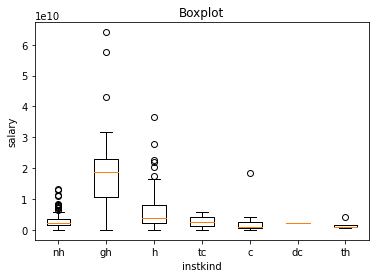

In [11]:
data = []

for i in instkind_list:
        table = df3.loc[df3['instkind'] == i, ['salary']]
        s = table['salary'].values.tolist()
        data.append(s)

        
plt.boxplot(data)
plt.xticks([1,2,3,4,5,6,7],['nh', 'gh', 'h', 'tc', 'c', 'dc', 'th'])
plt.xlabel('instkind')
plt.ylabel('salary')
plt.title('Boxplot')